# Web Programming
## 10/28/2021
<a href="?print-pdf">print view</a>

In [12]:
%%html
<script src="http://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>
<style>
.reveal pre { font-size: 100%}
.reveal .slides>section>section.present { max-height: 100%; overflow-y: auto;}
</style>

<script>

require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},
        scales: {
            yAxes: [{
                ticks: {
                    min: 0,
                }
            }]}}});
};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>


# Remember This?

<img src="https://asinansaglam.github.io/python_bio_2022/files/pgamnetwork.png">

<img src="https://asinansaglam.github.io/python_bio_2022/files/pgam.png">

http://bits.csb.pitt.edu/pgammodel/pgam.cgi

# Bringing your code to the web

Putting your applications online can make them much more useful.

In [2]:
%%html
<div id="whichrather" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#whichrather';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which would you rather use?",
		answers: ['A website','A python script'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Server side computing

We want a user to be able to run a python script through a web site.

They should be able to specify the input arguments.

They need to see the result (note this implies the python program should finish quickly).

The python script is run _on the server_.

# Common Gateway Interface

CGI provides a standard interface to let webservers execute programs.

http://bits.csb.pitt.edu/pgammodel/pgam.cgi

**pgam.cgi** is a python script, but because it has the **.cgi** extension, instead of displaying the contents of the file, the web server displays the output of running the script.

This means the output of **pgam.cgi** needs to be *a valid HTML response*.


In [ ]:
#!/usr/bin/env python3

print("Content-Type: text/html")     # HTML is following
print()                               # blank line, end of headers

import cgi
import cgitb
cgitb.enable()

from pysb.integrate import odesolve
import numpy as np
from model import model


print("""
    <style>
    body {
         font-family: 'Helvetica Neue', 'Helvetica', 'Arial', sans-serif;
         padding-left: 0.5em;
    }
    
    fieldset {
        display: inline-block;
        border:1px solid grey;
        border-radius:8px;
        vertical-align: top;
    }
    
    input {
    margin-left: 0.25em;
    }
    
    #conc td {
     padding-right: 1em;
    }
    
    table {
     display: inline-block;
     vertical-align: top
    }
    
    #submit {
    margin: 0.5em;
    font-size: 2em;
    }
    </style>
""")

form = cgi.FieldStorage()

time = float(form.getfirst("time","1200"))
model.parameters['INH_0'].value = float(form.getfirst("INH_0", "500"))
model.parameters['PG3_0'].value = float(form.getfirst("PG3_0", " 10000"))
model.parameters['ADP_0'].value = float(form.getfirst("ADP_0", " 10000"))
model.parameters['NADH_0'].value = float(form.getfirst("NADH_0", "2000"))
model.parameters['PGM_0'].value = float(form.getfirst("PGM_0", "14.9"))
model.parameters['ENO_0'].value = float(form.getfirst("ENO_0", "2.1"))
model.parameters['PKM_0'].value = float(form.getfirst("PKM_0", "0.60"))
model.parameters['LDH_0'].value = float(form.getfirst("LDH_0", "0.55"))

model.parameters['PGM_PG2kf'].value = float(form.getfirst("PGM_PG2kf", "0.04312"))
model.parameters['PGM_PG2kr'].value = float(form.getfirst("PGM_PG2kr", "0.014426"))
model.parameters['PGM_PG2kc'].value = float(form.getfirst("PGM_PG2kc", "0.387171"))

model.parameters['ENO_PG3kf'].value = float(form.getfirst("ENO_PG3kf", "0.011318"))
model.parameters['ENO_PG3kr'].value = float(form.getfirst("ENO_PG3kr", "0.013121"))
model.parameters['ENO_PG3kc'].value = float(form.getfirst("ENO_PG3kc", "6.706254"))

model.parameters['PKM_PEPkf'].value = float(form.getfirst("PKM_PEPkf", "0.002023"))
model.parameters['PKM_PEPkr'].value = float(form.getfirst("PKM_PEPkr", "0.016084"))
model.parameters['PKM_PEPkc'].value = float(form.getfirst("PKM_PEPkc", "7.880579"))

model.parameters['PKM_ADPkf'].value = float(form.getfirst("PKM_ADPkf", "0.002023"))
model.parameters['PKM_ADPkr'].value = float(form.getfirst("PKM_ADPkr", "0.016084"))

model.parameters['LDH_PYRkf'].value = float(form.getfirst("LDH_PYRkf", "0.029544"))
model.parameters['LDH_PYRkr'].value = float(form.getfirst("LDH_PYRkr", "0.009655"))
model.parameters['LDH_PYRkc'].value = float(form.getfirst("LDH_PYRkc", "14.775252"))

model.parameters['LDH_NADkf'].value = float(form.getfirst("LDH_NADkf", "0.029544"))
model.parameters['LDH_NADkr'].value = float(form.getfirst("LDH_NADkr", "0.009655"))

model.parameters['revLDH_PYRkf'].value = float(form.getfirst("revLDH_PYRkf", "0.00014"))
model.parameters['revLDH_PYRkr'].value = float(form.getfirst("revLDH_PYRkr", "20.677645"))
model.parameters['revLDH_PYRkc'].value = float(form.getfirst("revLDH_PYRkc", "0.01928"))

model.parameters['revLDH_NADkf'].value = float(form.getfirst("revLDH_NADkf", "0.00014"))
model.parameters['revLDH_NADkr'].value = float(form.getfirst("revLDH_NADkr", "20.677645"))


model.parameters['PGM_INHkf'].value = float(form.getfirst("PGM_INHkf", "0"))
model.parameters['PGM_INHkr'].value = float(form.getfirst("PGM_INHkr", "0"))

model.parameters['ENO_INHkf'].value = float(form.getfirst("ENO_INHkf", "0"))
model.parameters['ENO_INHkr'].value = float(form.getfirst("ENO_INHkr", "0"))

model.parameters['PKM_INHkf'].value = float(form.getfirst("PKM_INHkf", "0"))
model.parameters['PKM_INHkr'].value = float(form.getfirst("PKM_INHkr", "0"))

model.parameters['LDH_INHkf'].value = float(form.getfirst("LDH_INHkf", "0"))
model.parameters['LDH_INHkr'].value = float(form.getfirst("LDH_INHkr", "0"))



t = np.linspace(0,time)
out = odesolve(model, t)

print("""
<head><title>PGAM Assay Model</title></head>
<body>
The default parameters were fit to experimental data, as shown <a href="fitparams.png">here</a>.
<form action="pgam.cgi" style="vertical-align:top">


<fieldset>
<legend>INH</legend>
<label for=i1>PGM kf</label> <input id=l1 size=8 type="text" name="PGM_INHkf" value="%s">
<br>
<label for=i2>PGM kr</label> <input id=l2 size=8 type="text" name="PGM_INHkr" value="%s">
<hr>
<label for=i1>ENO kf</label> <input id=l1 size=8 type="text" name="ENO_INHkf" value="%s">
<br>
<label for=i2>ENO kr</label> <input id=l2 size=8 type="text" name="ENO_INHkr" value="%s">
<hr>
<label for=i1>PKM kf</label> <input id=l1 size=8 type="text" name="PKM_INHkf" value="%s">
<br>
<label for=i2>PKM kr</label> <input id=l2 size=8 type="text" name="PKM_INHkr" value="%s">
<hr>
<label for=i1>LDH kf</label> <input id=l1 size=8 type="text" name="LDH_INHkf" value="%s">
<br>
<label for=i2>LDH kr</label> <input id=l2 size=8 type="text" name="LDH_INHkr" value="%s">
</fieldset>


<table>
<tr><td>
<fieldset>
<legend>PGM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PGM_PG2kf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PGM_PG2kr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PGM_PG2kc" value="%s">
</fieldset>
</td></tr>
<tr><td>
<fieldset>
<legend>ENO</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="ENO_PG3kf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="ENO_PG3kr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="ENO_PG3kc" value="%s">
</fieldset>
</td></tr>
</table>


<table id=rtab>
<tr>
<td>
<fieldset>
<legend>PKM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PKM_PEPkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PKM_PEPkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PKM_PEPkc" value="%s">
<br>
<label for=i2>kf (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkf" value="%s">
<br>
<label for=i2>kr (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkr" value="%s">
</fieldset>


<fieldset>
<legend>LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="LDH_PYRkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="LDH_PYRkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="LDH_PYRkc" value="%s">
<br>
<label for=i2>kf (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkf" value="%s">
<br>
<label for=i2>kr (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkr" value="%s">
</fieldset>


<fieldset>
<legend>Reverse LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="revLDH_PYRkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="revLDH_PYRkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="revLDH_PYRkc" value="%s">
<br>
<label for=i2>kf (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkf" value="%s">
<br>
<label for=i2>kr (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkr" value="%s">
</fieldset>

</td></tr>
<tr><td>
<fieldset>
<legend>Initial Amounts</legend>
<table id=conc>
<tr>
<td><label for=i1>PGM</label> <input id=l1 size=6 type="text" name="PGM_0" value="%s"></td>
<td><label for=i2>ENO</label> <input id=l2 size=6 type="text" name="ENO_0" value="%s"></td>
<td><label for=i1>PKM</label> <input id=l1 size=6 type="text" name="PKM_0" value="%s"></td>
<td><label for=i2>LDH</label> <input id=l2 size=6 type="text" name="LDH_0" value="%s"></td>
</tr>
<tr>
<td><label for=i1>INH</label> <input id=l1 size=6 type="text" name="INH_0" value="%s"></td>
<td><label for=i2>3PG</label> <input id=l2 size=6 type="text" name="PG3_0" value="%s"></td>
<td><label for=i1>ADP</label> <input id=l1 size=6 type="text" name="ADP_0" value="%s"></td>
<td><label for=i2>NADH_0</label> <input id=l2 size=6 type="text" name="NADH_0" value="%s"></td>
</tr>
</table>
</fieldset>

</td>
</tr>
</table>
<br>
<div style="padding-left: 35em">
<h3 style="display: inline; padding-right: 1em">Time</h3>
<input size=8 type="text" name="time" value ="%s">
<input type="submit" id="submit" value="Submit">
</div>

</form>
""" % (
       model.parameters['PGM_INHkf'].value, model.parameters['PGM_INHkr'].value,
       model.parameters['ENO_INHkf'].value, model.parameters['ENO_INHkr'].value,
       model.parameters['PKM_INHkf'].value, model.parameters['PKM_INHkr'].value,
       model.parameters['LDH_INHkf'].value, model.parameters['LDH_INHkr'].value,
       model.parameters['PGM_PG2kf'].value, model.parameters['PGM_PG2kr'].value,model.parameters['PGM_PG2kc'].value,
       model.parameters['ENO_PG3kf'].value, model.parameters['ENO_PG3kr'].value,model.parameters['ENO_PG3kc'].value,
       model.parameters['PKM_PEPkf'].value, model.parameters['PKM_PEPkr'].value,model.parameters['PKM_PEPkc'].value,
       model.parameters['PKM_ADPkf'].value, model.parameters['PKM_ADPkr'].value,
       model.parameters['LDH_PYRkf'].value, model.parameters['LDH_PYRkr'].value,model.parameters['LDH_PYRkc'].value,
       model.parameters['LDH_NADkf'].value, model.parameters['LDH_NADkr'].value,
       model.parameters['revLDH_PYRkf'].value, model.parameters['revLDH_PYRkr'].value,model.parameters['revLDH_PYRkc'].value,
       model.parameters['revLDH_NADkf'].value, model.parameters['revLDH_NADkr'].value,

       model.parameters['PGM_0'].value,
       model.parameters['ENO_0'].value,
       model.parameters['PKM_0'].value,
       model.parameters['LDH_0'].value,
       model.parameters['INH_0'].value,
       model.parameters['PG3_0'].value,
       model.parameters['ADP_0'].value,
       model.parameters['NADH_0'].value,

       time
       )
)

pg3data = ','.join(np.round(out['oPG3'],2).astype(str))
pg2data = ','.join(np.round(out['oPG2'],2).astype(str))
pepdata = ','.join(np.round(out['oPEP'],2).astype(str))
pyrdata = ','.join(np.round(out['oPYR'],2).astype(str))
lacdata = ','.join(np.round(out['oLAC'],2).astype(str))
nadhdata= ','.join(np.round(out['oNADH'],2).astype(str))

times = ','.join(np.round(t).astype(str))

print("""
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/1.0.2/Chart.min.js">
</script>
<script src="https://code.jquery.com/jquery-1.11.3.min.js"></script>
<div style="position: relative; width: 800px">
<div style="position: absolute; right: 0; background-color: white; border: 1px solid black; padding-right: 1em" id="legend"></div>
<canvas id="chart" width="900" height="500"></canvas>
</div>
<script>
var data = {
labels: [%s],
datasets: [
{
label: "3PG",
strokeColor: "#0e0",
pointColor: "#0e0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "0e0",
data: [%s]
},
{
label: "2PG",
strokeColor: "#0ee",
pointColor: "#0ee",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#0ee",
data: [%s]
},
{
label: "PEP",
strokeColor: "#00f",
pointColor: "#00f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#00f",
data: [%s]
},
{
label: "PYR",
strokeColor: "#ee0",
pointColor: "#ee0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#ee0",
data: [%s]
},
{
label: "LAC",
strokeColor: "#f0f",
pointColor: "#f0f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f0f",
data: [%s]
},
{
label: "NADH",
strokeColor: "#f00",
pointColor: "#f00",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f00",
strokeWidth: 4,
data: [%s]
}
]
};
""" % (times, pg3data, pg2data,pepdata,pyrdata,lacdata,nadhdata))

print("""
$(function() {
// Get the context of the canvas element we want to select
var ctx = document.getElementById("chart").getContext("2d");
console.log(ctx);
var chart = new Chart(ctx).Line(data, {datasetFill: false, scaleIntegersOnly: false, scaleBeginAtZero: true, """)
print(r'multiTooltipTemplate: "<%= datasetLabel %> - <%= value %>",')
print(r'legendTemplate : "<ul class=\"<%=name.toLowerCase()%>-legend\"><% for (var i=0; i<datasets.length; i++){%><span style=\"color:<%=datasets[i].strokeColor%>\"><li><%if(datasets[i].label){%><%=datasets[i].label%><%}%></li></span><%}%></ul>"')
print("""
});

var legend = chart.generateLegend();

//and append it to your page somewhere
$("#legend").append(legend);
});
</script>
</body>
""")


# Configuring CGI

Most web servers will have CGI disabled by default (or only enable in a specific directory like <tt>cgi-bin</tt>).

https://httpd.apache.org/docs/2.4/howto/cgi.html#configuring

For apache you have to
 1. Enable the cgi module
 2. Allow CGI execution in a given directory
 3. Specify what extensions should be treated as cgi scripts
 

Example apache configuration file:
```
 <Directory "/usr/local/apache2/htdocs/somedir">
    Options +ExecCGI
    AddHandler cgi-script .cgi .py
</Directory>
```



# .htaccess

Apache (and other web servers) can dynamically apply options to a directory based on the contents of a **.htaccess** file in that directory (this feature has to be [enabled](https://httpd.apache.org/docs/2.4/mod/core.html#allowoverride) by the server administrator).

```
$ cat .htaccess 
AddHandler cgi-script .py .cgi
Options +ExecCGI +Indexes
```

https://httpd.apache.org/docs/2.4/howto/htaccess.html

# Common Problems

Debugging CGI programs is annoying, as you are not running the program, the webserver is.  If there's a problem, the error message returned to the user in the browser is usually generic.  More informative error messages *might* be in the logs of the webserver.

 * The code of the script displays instead of the output
   * Is CGI enabled on the server?
   * Is it enabled on the directory with the script and are the correct handlers configured?
   * If a .htaccess file is being used to configure, is the server setup to allow such configuration?
 * Internal Server Error 
   * Look in <tt>/var/log/apache2/error.log</tt>
   * Does the script have the right permissions (must be executable by the webserver user)?
   * Does the script print the correct HTTP response lines as its first two lines? (if not, will get malformed header error)
   * Does it run as a standalone script (it starts with <tt>#!/usr/bin/env python</tt>)?
   * Does the script have a syntax error? Try running it directly
   

# Debugging CGI

To aid in the debugging of python errors, enable cgitb, which will (sometimes) show the errors in the browser instead of the log files.

https://docs.python.org/3/library/cgitb.html

<img src="imgs/cgibt.png">

# CGI Input

Values are provided to CGI programs through GET and PUT requests, most likely those generated using form data.
```
<form action="pgam.cgi" style="vertical-align:top">
<fieldset>
<legend>INH</legend>
<label for=i1>PGM kf</label> <input id=l1 size=8 type="text" name="PGM_INHkf" value="0.3">
<label for=i2>PGM kr</label> <input id=l2 size=8 type="text" name="PGM_INHkr" value="0.2">
<label for=i1>ENO kf</label> <input id=l1 size=8 type="text" name="ENO_INHkf" value="0.0">
<label for=i2>ENO kr</label> <input id=l2 size=8 type="text" name="ENO_INHkr" value="0.0">
<label for=i1>PKM kf</label> <input id=l1 size=8 type="text" name="PKM_INHkf" value="0.0">
<label for=i2>PKM kr</label> <input id=l2 size=8 type="text" name="PKM_INHkr" value="0.0">
<label for=i1>LDH kf</label> <input id=l1 size=8 type="text" name="LDH_INHkf" value="0.0">
<label for=i2>LDH kr</label> <input id=l2 size=8 type="text" name="LDH_INHkr" value="0.0">
</fieldset>

```
http://bits.csb.pitt.edu/pgammodel/pgam.cgi?PGM_INHkf=0.3&PGM_INHkr=0.2&ENO_INHkf=0.0&ENO_INHkr=0.0&PKM_INHkf=0.0&PKM_INHkr=0.0&LDH_INHkf=0.0&LDH_INHkr=0.0

# CGI Input

These values can be accessed through the <tt>cgi</tt> module (what is happening behind the scenes as they are being set as environment variables before the script is called).

The **name** from the <tt>input</tt> element becomes a field.

In [ ]:
import cgi
form = cgi.FieldStorage()

model.parameters['PGM_INHkf'].value = float(form.getfirst("PGM_INHkf", "0"))
model.parameters['PGM_INHkr'].value = float(form.getfirst("PGM_INHkr", "0"))

model.parameters['ENO_INHkf'].value = float(form.getfirst("ENO_INHkf", "0"))
model.parameters['ENO_INHkr'].value = float(form.getfirst("ENO_INHkr", "0"))

model.parameters['PKM_INHkf'].value = float(form.getfirst("PKM_INHkf", "0"))
model.parameters['PKM_INHkr'].value = float(form.getfirst("PKM_INHkr", "0"))

model.parameters['LDH_INHkf'].value = float(form.getfirst("LDH_INHkf", "0"))
model.parameters['LDH_INHkr'].value = float(form.getfirst("LDH_INHkr", "0"))

# FieldStorage 

* Acts a dictionary (e.g. `form['PKM_INHkf']`), this returns another FieldStorage object
* **.getvalue(name)** return value(s) corresponding to name (list if multiple such values)
* **.getlist(name)** same, but always returns list
* **.getfirst(name,default)** always returns a single value, default if name doesn't exist

If an item is a file upload (`<input type=file>`), <tt>getvalue</tt> will return contents of object.  Can also get file object:

In [ ]:
f = form['filefield'].file

# CGI Output

The stdout of the script becomes the source of the web page, but what about images?

* Can create images on the server and reference their URLs 
   * could result in a lot of images being generated (archival)
   * images viewable by anyone with the URL
   * need to be able to write to server
* Can embed images using base64


In [5]:
import base64
img = open('imgs/dog.png', 'rb').read()
data = base64.b64encode(img)  # returns a byte array
img_tag = '<img src="data:image/png;base64,{0}">'.format(data.decode())



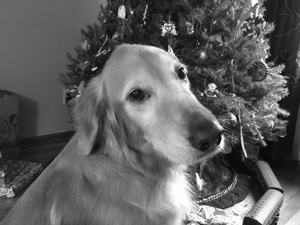

In [6]:
print(img_tag)

In [7]:
%%html
<div id="rb" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#rb';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the b in rb for in the open?",
		answers: ['Binary','Big','Bytes','Blue'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

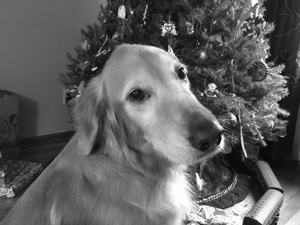


# Client Side Processing

Alternatively, as is the case with pgam.cgi, we can generate visualizations on the client side.
 * Generate data on the server
 * Visualize the data using the browser - supports fast user interaction
 
This means we must write some **JavaScript**

http://bits.csb.pitt.edu/pgammodel/pgam.cgi



# Example (snippet)

In [ ]:
print('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/1.0.2/Chart.min.js">
</script>
<script src="https://code.jquery.com/jquery-1.11.3.min.js"></script>
<div style="position: relative; width: 800px">
<div style="position: absolute; right: 0; background-color: white; border: 1px solid black; padding-right: 1em" id="legend"></div>
<canvas id="chart" width="900" height="500"></canvas>
</div>
<script>
var data = {
labels: [%s],
datasets: [
{
label: "3PG",
strokeColor: "#0e0",
pointColor: "#0e0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "0e0",
data: [%s]
},
'''% (times, pg3data))

# Example (snippet)

In [ ]:
print("""
$(function() {
// Get the context of the canvas element we want to select
var ctx = document.getElementById("chart").getContext("2d");
console.log(ctx);
var chart = new Chart(ctx).Line(data, {datasetFill: false, scaleIntegersOnly: false, scaleBeginAtZero: true, """)
print(r'multiTooltipTemplate: "<%= datasetLabel %> - <%= value %>",')
print(r'legendTemplate : "<ul class=\"<%=name.toLowerCase()%>-legend\"><% for (var i=0; i<datasets.length; i++){%><span style=\"color:<%=datasets[i].strokeColor%>\"><li><%if(datasets[i].label){%><%=datasets[i].label%><%}%></li></span><%}%></ul>"')
print("""
});
""")


# The Web Page

In [ ]:

    <style>
    body {
         font-family: 'Helvetica Neue', 'Helvetica', 'Arial', sans-serif;
         padding-left: 0.5em;
    }
    
    fieldset {
        display: inline-block;
        border:1px solid grey;
        border-radius:8px;
        vertical-align: top;
    }
    
    input {
    margin-left: 0.25em;
    }
    
    #conc td {
     padding-right: 1em;
    }
    
    table {
     display: inline-block;
     vertical-align: top
    }
    
    #submit {
    margin: 0.5em;
    font-size: 2em;
    }
    </style>


<head><title>PGAM Assay Model</title></head>
<body>
The default parameters were fit to experimental data, as shown <a href="fitparams.png">here</a>.
<form action="pgam.cgi" style="vertical-align:top">


<fieldset>
<legend>INH</legend>
<label for=i1>PGM kf</label> <input id=l1 size=8 type="text" name="PGM_INHkf" value="0.0">
<br>
<label for=i2>PGM kr</label> <input id=l2 size=8 type="text" name="PGM_INHkr" value="0.0">
<hr>
<label for=i1>ENO kf</label> <input id=l1 size=8 type="text" name="ENO_INHkf" value="0.0">
<br>
<label for=i2>ENO kr</label> <input id=l2 size=8 type="text" name="ENO_INHkr" value="0.0">
<hr>
<label for=i1>PKM kf</label> <input id=l1 size=8 type="text" name="PKM_INHkf" value="0.0">
<br>
<label for=i2>PKM kr</label> <input id=l2 size=8 type="text" name="PKM_INHkr" value="0.0">
<hr>
<label for=i1>LDH kf</label> <input id=l1 size=8 type="text" name="LDH_INHkf" value="0.0">
<br>
<label for=i2>LDH kr</label> <input id=l2 size=8 type="text" name="LDH_INHkr" value="0.0">
</fieldset>


<table>
<tr><td>
<fieldset>
<legend>PGM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PGM_PG2kf" value="0.04312">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PGM_PG2kr" value="0.014426">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PGM_PG2kc" value="0.387171">
</fieldset>
</td></tr>
<tr><td>
<fieldset>
<legend>ENO</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="ENO_PG3kf" value="0.011318">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="ENO_PG3kr" value="0.013121">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="ENO_PG3kc" value="6.706254">
</fieldset>
</td></tr>
</table>


<table id=rtab>
<tr>
<td>
<fieldset>
<legend>PKM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PKM_PEPkf" value="0.002023">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PKM_PEPkr" value="0.016084">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PKM_PEPkc" value="7.880579">
<br>
<label for=i2>kf (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkf" value="0.002023">
<br>
<label for=i2>kr (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkr" value="0.016084">
</fieldset>


<fieldset>
<legend>LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="LDH_PYRkf" value="0.029544">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="LDH_PYRkr" value="0.009655">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="LDH_PYRkc" value="14.775252">
<br>
<label for=i2>kf (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkf" value="0.029544">
<br>
<label for=i2>kr (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkr" value="0.009655">
</fieldset>


<fieldset>
<legend>Reverse LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="revLDH_PYRkf" value="0.00014">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="revLDH_PYRkr" value="20.677645">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="revLDH_PYRkc" value="0.01928">
<br>
<label for=i2>kf (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkf" value="0.00014">
<br>
<label for=i2>kr (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkr" value="20.677645">
</fieldset>

</td></tr>
<tr><td>
<fieldset>
<legend>Initial Amounts</legend>
<table id=conc>
<tr>
<td><label for=i1>PGM</label> <input id=l1 size=6 type="text" name="PGM_0" value="14.9"></td>
<td><label for=i2>ENO</label> <input id=l2 size=6 type="text" name="ENO_0" value="2.1"></td>
<td><label for=i1>PKM</label> <input id=l1 size=6 type="text" name="PKM_0" value="0.6"></td>
<td><label for=i2>LDH</label> <input id=l2 size=6 type="text" name="LDH_0" value="0.55"></td>
</tr>
<tr>
<td><label for=i1>INH</label> <input id=l1 size=6 type="text" name="INH_0" value="500.0"></td>
<td><label for=i2>3PG</label> <input id=l2 size=6 type="text" name="PG3_0" value="10000.0"></td>
<td><label for=i1>ADP</label> <input id=l1 size=6 type="text" name="ADP_0" value="10000.0"></td>
<td><label for=i2>NADH_0</label> <input id=l2 size=6 type="text" name="NADH_0" value="2000.0"></td>
</tr>
</table>
</fieldset>

</td>
</tr>
</table>
<br>
<div style="padding-left: 35em">
<h3 style="display: inline; padding-right: 1em">Time</h3>
<input size=8 type="text" name="time" value ="1200.0">
<input type="submit" id="submit" value="Submit">
</div>

</form>


<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/1.0.2/Chart.min.js">
</script>
<script src="https://code.jquery.com/jquery-1.11.3.min.js"></script>
<div style="position: relative; width: 800px">
<div style="position: absolute; right: 0; background-color: white; border: 1px solid black; padding-right: 1em" id="legend"></div>
<canvas id="chart" width="900" height="500"></canvas>
</div>
<script>
var data = {
labels: [0.0,24.0,49.0,73.0,98.0,122.0,147.0,171.0,196.0,220.0,245.0,269.0,294.0,318.0,343.0,367.0,392.0,416.0,441.0,465.0,490.0,514.0,539.0,563.0,588.0,612.0,637.0,661.0,686.0,710.0,735.0,759.0,784.0,808.0,833.0,857.0,882.0,906.0,931.0,955.0,980.0,1004.0,1029.0,1053.0,1078.0,1102.0,1127.0,1151.0,1176.0,1200.0],
datasets: [
{
label: "3PG",
strokeColor: "#0e0",
pointColor: "#0e0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "0e0",
data: [10000.0,9843.98,9702.84,9561.7,9420.56,9279.42,9138.29,8997.15,8856.02,8714.9,8573.77,8432.65,8291.53,8150.41,8009.29,7868.18,7727.07,7585.97,7444.86,7303.76,7162.67,7021.58,6880.49,6739.4,6598.32,6457.25,6316.18,6175.11,6034.05,5892.99,5751.94,5610.89,5469.85,5328.82,5187.79,5046.77,4905.76,4764.75,4623.75,4482.76,4341.79,4200.82,4059.86,3918.91,3777.97,3637.05,3496.14,3355.25,3214.37,3073.51]
},
{
label: "2PG",
strokeColor: "#0ee",
pointColor: "#0ee",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#0ee",
data: [0.0,110.38,182.62,233.83,271.74,300.55,322.83,340.29,354.09,365.07,373.86,380.91,386.6,391.2,394.91,397.92,400.37,402.35,403.96,405.27,406.33,407.19,407.89,408.46,408.92,409.29,409.59,409.83,410.02,410.17,410.29,410.38,410.45,410.5,410.54,410.56,410.57,410.58,410.57,410.56,410.54,410.52,410.49,410.46,410.42,410.37,410.33,410.27,410.22,410.15]
},
{
label: "PEP",
strokeColor: "#00f",
pointColor: "#00f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#00f",
data: [0.0,30.11,97.06,182.91,279.63,382.88,490.08,599.59,710.33,821.56,932.77,1043.61,1153.83,1263.26,1371.78,1479.33,1585.84,1691.32,1795.73,1899.1,2001.42,2102.73,2203.05,2302.4,2400.81,2498.31,2594.94,2690.72,2785.69,2879.87,2973.3,3066.01,3158.02,3249.36,3340.06,3430.14,3519.63,3608.55,3696.93,3784.79,3872.14,3959.01,4045.42,4131.39,4216.93,4302.06,4386.8,4471.17,4555.17,4638.84]
},
{
label: "PYR",
strokeColor: "#ee0",
pointColor: "#ee0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#ee0",
data: [0.0,0.28,1.71,4.49,8.43,13.25,18.71,24.6,30.74,37.02,43.35,49.65,55.89,62.02,68.03,73.91,79.64,85.22,90.64,95.91,101.02,105.99,110.81,115.5,120.04,124.45,128.74,132.9,136.96,140.9,144.73,148.47,152.12,155.68,159.17,162.58,165.94,169.25,172.52,175.77,179.01,182.26,185.56,188.94,192.44,196.14,200.11,204.48,209.44,215.23]
},
{
label: "LAC",
strokeColor: "#f0f",
pointColor: "#f0f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f0f",
data: [0.0,0.03,0.38,1.56,4.06,8.24,14.38,22.61,33.02,45.63,60.4,77.29,96.25,117.19,140.03,164.69,191.09,219.15,248.79,279.93,312.51,346.45,381.69,418.17,455.82,494.6,534.45,575.33,617.17,659.94,703.6,748.1,793.41,839.48,886.28,933.77,981.92,1030.68,1080.03,1129.93,1180.32,1231.18,1282.46,1334.09,1386.01,1438.14,1490.37,1542.57,1594.53,1645.98]
},
{
label: "NADH",
strokeColor: "#f00",
pointColor: "#f00",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f00",
strokeWidth: 4,
data: [2000.0,1999.42,1999.07,1997.89,1995.4,1991.21,1985.08,1976.84,1966.43,1953.83,1939.06,1922.17,1903.21,1882.28,1859.44,1834.78,1808.38,1780.32,1750.68,1719.54,1686.97,1653.03,1617.79,1581.31,1543.66,1504.88,1465.03,1424.16,1382.32,1339.55,1295.89,1251.39,1206.09,1160.02,1113.23,1065.74,1017.59,968.83,919.49,869.6,819.21,768.36,717.09,665.47,613.56,561.44,509.22,457.04,405.09,353.67]
}
]
};


$(function() {
// Get the context of the canvas element we want to select
var ctx = document.getElementById("chart").getContext("2d");
console.log(ctx);
var chart = new Chart(ctx).Line(data, {datasetFill: false, scaleIntegersOnly: false, scaleBeginAtZero: true, 
multiTooltipTemplate: "<%= datasetLabel %> - <%= value %>",
legendTemplate : "<ul class=\"<%=name.toLowerCase()%>-legend\"><% for (var i=0; i<datasets.length; i++){%><span style=\"color:<%=datasets[i].strokeColor%>\"><li><%if(datasets[i].label){%><%=datasets[i].label%><%}%></li></span><%}%></ul>"

});

var legend = chart.generateLegend();

//and append it to your page somewhere
$("#legend").append(legend);
});
</script>
</body>



# The CGI Script

In [ ]:
#!/usr/bin/env python3

import cgi
import cgitb
from pysb.integrate import odesolve
import numpy as np
from model import model

cgitb.enable()


print("Content-Type: text/html")     # HTML is following
print()                              # blank line, end of headers


print("""
    <style>
    body {
         font-family: 'Helvetica Neue', 'Helvetica', 'Arial', sans-serif;
         padding-left: 0.5em;
    }
    
    fieldset {
        display: inline-block;
        border:1px solid grey;
        border-radius:8px;
        vertical-align: top;
    }
    
    input {
    margin-left: 0.25em;
    }
    
    #conc td {
     padding-right: 1em;
    }
    
    table {
     display: inline-block;
     vertical-align: top
    }
    
    #submit {
    margin: 0.5em;
    font-size: 2em;
    }
    </style>
""")

form = cgi.FieldStorage()

time = float(form.getfirst("time","1200"))
model.parameters['INH_0'].value = float(form.getfirst("INH_0", "500"))
model.parameters['PG3_0'].value = float(form.getfirst("PG3_0", " 10000"))
model.parameters['ADP_0'].value = float(form.getfirst("ADP_0", " 10000"))
model.parameters['NADH_0'].value = float(form.getfirst("NADH_0", "2000"))
model.parameters['PGM_0'].value = float(form.getfirst("PGM_0", "14.9"))
model.parameters['ENO_0'].value = float(form.getfirst("ENO_0", "2.1"))
model.parameters['PKM_0'].value = float(form.getfirst("PKM_0", "0.60"))
model.parameters['LDH_0'].value = float(form.getfirst("LDH_0", "0.55"))

model.parameters['PGM_PG2kf'].value = float(form.getfirst("PGM_PG2kf", "0.04312"))
model.parameters['PGM_PG2kr'].value = float(form.getfirst("PGM_PG2kr", "0.014426"))
model.parameters['PGM_PG2kc'].value = float(form.getfirst("PGM_PG2kc", "0.387171"))

model.parameters['ENO_PG3kf'].value = float(form.getfirst("ENO_PG3kf", "0.011318"))
model.parameters['ENO_PG3kr'].value = float(form.getfirst("ENO_PG3kr", "0.013121"))
model.parameters['ENO_PG3kc'].value = float(form.getfirst("ENO_PG3kc", "6.706254"))

model.parameters['PKM_PEPkf'].value = float(form.getfirst("PKM_PEPkf", "0.002023"))
model.parameters['PKM_PEPkr'].value = float(form.getfirst("PKM_PEPkr", "0.016084"))
model.parameters['PKM_PEPkc'].value = float(form.getfirst("PKM_PEPkc", "7.880579"))

model.parameters['PKM_ADPkf'].value = float(form.getfirst("PKM_ADPkf", "0.002023"))
model.parameters['PKM_ADPkr'].value = float(form.getfirst("PKM_ADPkr", "0.016084"))

model.parameters['LDH_PYRkf'].value = float(form.getfirst("LDH_PYRkf", "0.029544"))
model.parameters['LDH_PYRkr'].value = float(form.getfirst("LDH_PYRkr", "0.009655"))
model.parameters['LDH_PYRkc'].value = float(form.getfirst("LDH_PYRkc", "14.775252"))

model.parameters['LDH_NADkf'].value = float(form.getfirst("LDH_NADkf", "0.029544"))
model.parameters['LDH_NADkr'].value = float(form.getfirst("LDH_NADkr", "0.009655"))

model.parameters['revLDH_PYRkf'].value = float(form.getfirst("revLDH_PYRkf", "0.00014"))
model.parameters['revLDH_PYRkr'].value = float(form.getfirst("revLDH_PYRkr", "20.677645"))
model.parameters['revLDH_PYRkc'].value = float(form.getfirst("revLDH_PYRkc", "0.01928"))

model.parameters['revLDH_NADkf'].value = float(form.getfirst("revLDH_NADkf", "0.00014"))
model.parameters['revLDH_NADkr'].value = float(form.getfirst("revLDH_NADkr", "20.677645"))


model.parameters['PGM_INHkf'].value = float(form.getfirst("PGM_INHkf", "0"))
model.parameters['PGM_INHkr'].value = float(form.getfirst("PGM_INHkr", "0"))

model.parameters['ENO_INHkf'].value = float(form.getfirst("ENO_INHkf", "0"))
model.parameters['ENO_INHkr'].value = float(form.getfirst("ENO_INHkr", "0"))

model.parameters['PKM_INHkf'].value = float(form.getfirst("PKM_INHkf", "0"))
model.parameters['PKM_INHkr'].value = float(form.getfirst("PKM_INHkr", "0"))

model.parameters['LDH_INHkf'].value = float(form.getfirst("LDH_INHkf", "0"))
model.parameters['LDH_INHkr'].value = float(form.getfirst("LDH_INHkr", "0"))



t = np.linspace(0,time)
out = odesolve(model, t)

print("""
<head><title>PGAM Assay Model</title></head>
<body>
The default parameters were fit to experimental data, as shown <a href="fitparams.png">here</a>.
<form action="pgam.cgi" style="vertical-align:top">


<fieldset>
<legend>INH</legend>
<label for=i1>PGM kf</label> <input id=l1 size=8 type="text" name="PGM_INHkf" value="%s">
<br>
<label for=i2>PGM kr</label> <input id=l2 size=8 type="text" name="PGM_INHkr" value="%s">
<hr>
<label for=i1>ENO kf</label> <input id=l1 size=8 type="text" name="ENO_INHkf" value="%s">
<br>
<label for=i2>ENO kr</label> <input id=l2 size=8 type="text" name="ENO_INHkr" value="%s">
<hr>
<label for=i1>PKM kf</label> <input id=l1 size=8 type="text" name="PKM_INHkf" value="%s">
<br>
<label for=i2>PKM kr</label> <input id=l2 size=8 type="text" name="PKM_INHkr" value="%s">
<hr>
<label for=i1>LDH kf</label> <input id=l1 size=8 type="text" name="LDH_INHkf" value="%s">
<br>
<label for=i2>LDH kr</label> <input id=l2 size=8 type="text" name="LDH_INHkr" value="%s">
</fieldset>


<table>
<tr><td>
<fieldset>
<legend>PGM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PGM_PG2kf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PGM_PG2kr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PGM_PG2kc" value="%s">
</fieldset>
</td></tr>
<tr><td>
<fieldset>
<legend>ENO</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="ENO_PG3kf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="ENO_PG3kr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="ENO_PG3kc" value="%s">
</fieldset>
</td></tr>
</table>


<table id=rtab>
<tr>
<td>
<fieldset>
<legend>PKM</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="PKM_PEPkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="PKM_PEPkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="PKM_PEPkc" value="%s">
<br>
<label for=i2>kf (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkf" value="%s">
<br>
<label for=i2>kr (ADP)</label> <input id=l2 size=8 type="text" name="PKM_ADPkr" value="%s">
</fieldset>


<fieldset>
<legend>LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="LDH_PYRkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="LDH_PYRkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="LDH_PYRkc" value="%s">
<br>
<label for=i2>kf (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkf" value="%s">
<br>
<label for=i2>kr (NADH)</label> <input id=l2 size=8 type="text" name="LDH_NADkr" value="%s">
</fieldset>


<fieldset>
<legend>Reverse LDH</legend>

<label for=i1>kf</label> <input id=l1 size=8 type="text" name="revLDH_PYRkf" value="%s">
<br>
<label for=i2>kr</label> <input id=l2 size=8 type="text" name="revLDH_PYRkr" value="%s">
<br>
<label for=i2>kc</label> <input id=l2 size=8 type="text" name="revLDH_PYRkc" value="%s">
<br>
<label for=i2>kf (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkf" value="%s">
<br>
<label for=i2>kr (NAD)</label> <input id=l2 size=8 type="text" name="revLDH_NADkr" value="%s">
</fieldset>

</td></tr>
<tr><td>
<fieldset>
<legend>Initial Amounts</legend>
<table id=conc>
<tr>
<td><label for=i1>PGM</label> <input id=l1 size=6 type="text" name="PGM_0" value="%s"></td>
<td><label for=i2>ENO</label> <input id=l2 size=6 type="text" name="ENO_0" value="%s"></td>
<td><label for=i1>PKM</label> <input id=l1 size=6 type="text" name="PKM_0" value="%s"></td>
<td><label for=i2>LDH</label> <input id=l2 size=6 type="text" name="LDH_0" value="%s"></td>
</tr>
<tr>
<td><label for=i1>INH</label> <input id=l1 size=6 type="text" name="INH_0" value="%s"></td>
<td><label for=i2>3PG</label> <input id=l2 size=6 type="text" name="PG3_0" value="%s"></td>
<td><label for=i1>ADP</label> <input id=l1 size=6 type="text" name="ADP_0" value="%s"></td>
<td><label for=i2>NADH_0</label> <input id=l2 size=6 type="text" name="NADH_0" value="%s"></td>
</tr>
</table>
</fieldset>

</td>
</tr>
</table>
<br>
<div style="padding-left: 35em">
<h3 style="display: inline; padding-right: 1em">Time</h3>
<input size=8 type="text" name="time" value ="%s">
<input type="submit" id="submit" value="Submit">
</div>

</form>
""" % (
       model.parameters['PGM_INHkf'].value, model.parameters['PGM_INHkr'].value,
       model.parameters['ENO_INHkf'].value, model.parameters['ENO_INHkr'].value,
       model.parameters['PKM_INHkf'].value, model.parameters['PKM_INHkr'].value,
       model.parameters['LDH_INHkf'].value, model.parameters['LDH_INHkr'].value,
       model.parameters['PGM_PG2kf'].value, model.parameters['PGM_PG2kr'].value,model.parameters['PGM_PG2kc'].value,
       model.parameters['ENO_PG3kf'].value, model.parameters['ENO_PG3kr'].value,model.parameters['ENO_PG3kc'].value,
       model.parameters['PKM_PEPkf'].value, model.parameters['PKM_PEPkr'].value,model.parameters['PKM_PEPkc'].value,
       model.parameters['PKM_ADPkf'].value, model.parameters['PKM_ADPkr'].value,
       model.parameters['LDH_PYRkf'].value, model.parameters['LDH_PYRkr'].value,model.parameters['LDH_PYRkc'].value,
       model.parameters['LDH_NADkf'].value, model.parameters['LDH_NADkr'].value,
       model.parameters['revLDH_PYRkf'].value, model.parameters['revLDH_PYRkr'].value,model.parameters['revLDH_PYRkc'].value,
       model.parameters['revLDH_NADkf'].value, model.parameters['revLDH_NADkr'].value,

       model.parameters['PGM_0'].value,
       model.parameters['ENO_0'].value,
       model.parameters['PKM_0'].value,
       model.parameters['LDH_0'].value,
       model.parameters['INH_0'].value,
       model.parameters['PG3_0'].value,
       model.parameters['ADP_0'].value,
       model.parameters['NADH_0'].value,

       time
       ))


pg3data = ','.join(np.round(out['oPG3'],2).astype(str))
pg2data = ','.join(np.round(out['oPG2'],2).astype(str))
pepdata = ','.join(np.round(out['oPEP'],2).astype(str))
pyrdata = ','.join(np.round(out['oPYR'],2).astype(str))
lacdata = ','.join(np.round(out['oLAC'],2).astype(str))
nadhdata= ','.join(np.round(out['oNADH'],2).astype(str))

times = ','.join(np.round(t).astype(str))

print("""
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/1.0.2/Chart.min.js">
</script>
<script src="https://code.jquery.com/jquery-1.11.3.min.js"></script>
<div style="position: relative; width: 800px">
<div style="position: absolute; right: 0; background-color: white; border: 1px solid black; padding-right: 1em" id="legend"></div>
<canvas id="chart" width="900" height="500"></canvas>
</div>
<script>
var data = {
labels: [%s],
datasets: [
{
label: "3PG",
strokeColor: "#0e0",
pointColor: "#0e0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "0e0",
data: [%s]
},
{
label: "2PG",
strokeColor: "#0ee",
pointColor: "#0ee",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#0ee",
data: [%s]
},
{
label: "PEP",
strokeColor: "#00f",
pointColor: "#00f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#00f",
data: [%s]
},
{
label: "PYR",
strokeColor: "#ee0",
pointColor: "#ee0",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#ee0",
data: [%s]
},
{
label: "LAC",
strokeColor: "#f0f",
pointColor: "#f0f",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f0f",
data: [%s]
},
{
label: "NADH",
strokeColor: "#f00",
pointColor: "#f00",
pointStrokeColor: "#fff",
pointHighlightFill: "#fff",
pointHighlightStroke: "#f00",
strokeWidth: 4,
data: [%s]
}
]
};
""" % (times, pg3data, pg2data,pepdata,pyrdata,lacdata,nadhdata))

print("""
// Get the context of the canvas element we want to select
var ctx = document.getElementById("chart").getContext("2d");
var chart = new Chart(ctx).Line(data, {datasetFill: false, scaleIntegersOnly: false, scaleBeginAtZero: true, """)
print(r'multiTooltipTemplate: "<%= datasetLabel %> - <%= value %>",')
print(r'legendTemplate : "<ul class=\"<%=name.toLowerCase()%>-legend\"><% for (var i=0; i<datasets.length; i++){%><span style=\"color:<%=datasets[i].strokeColor%>\"><li><%if(datasets[i].label){%><%=datasets[i].label%><%}%></li></span><%}%></ul>"')
print("""
});

var legend = chart.generateLegend();

//and append it to your page somewhere
$("#legend").append(legend);
</script>
</body>
""")


# Project: MadLibs

Write a website that does MadLibs.
 * Ask the user for a noun, verb, and adjective (or more if you want)
 * When they click submit, return story using those words
 * Do this with *one* script
 
```
ssh userid@python.mscbio2025.net
mkdir public_html
chmod +x .
chmod +rx public_html
cd public_html
```
Visit your website at http://python.mscbio2025.net/~userid/

# Example

http://python.mscbio2025.net/~dkoes/madlibs.py

